# 2 - Modélisation

## Modèle très simple de classification

### Régression Logistique

Entrainons une régression logistique simple avec le data set mit_train, puis testons le avec le dataset mit_test.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mit_test = pd.read_csv("../data/mitbih_test.csv", header=None)
mit_train = pd.read_csv("../data/mitbih_train.csv", header=None)

In [3]:
X_train = mit_train.iloc[:,:-1]
y_train = mit_train.iloc[:,-1]
X_test = mit_test.iloc[:,:-1]
y_test = mit_test.iloc[:,-1]

Regardons la distribution des classes :

In [44]:
liste = []

for i in range(len(y_train.value_counts())):
    x = "Classe {} : {}%".format(round(y_train.value_counts(normalize = True).index[i]), round(100*y_train.value_counts(normalize = True).iloc[i]))
    liste.append(x)


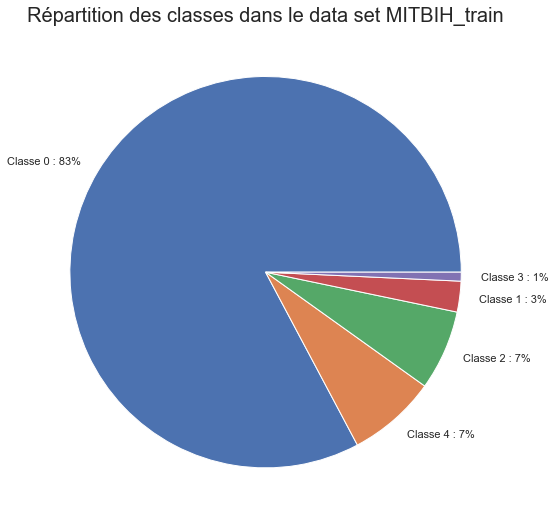

In [45]:
plt.figure(figsize = (16,9))
sns.set_theme()
plt.title("Répartition des classes dans le data set MITBIH_train", fontsize = 20)
plt.pie(y_train.value_counts(), labels = liste);

In [5]:
y_test.value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

On voit que les classes sont déséquilibrées, la classe 0 est fortement majoritaire. Regardons l'impact sur les résultats du modèle.

In [47]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\saman\anaconda3\envs\heart-ds\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
pd.crosstab(y_test, y_pred, rownames = ["réel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
réel,,,,,
0.0,17828,26,210,15,39
1.0,326,198,32,0,0
2.0,898,11,485,26,28
3.0,107,0,8,47,0
4.0,187,0,22,0,1399


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.84      0.36      0.50       556
         2.0       0.64      0.33      0.44      1448
         3.0       0.53      0.29      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.64     21892
weighted avg       0.90      0.91      0.90     21892



Comme prévu, le modèle a tendance à largement prédire la classe 0. Ainsi les rappels des classes 1, 2 et 3 sont mauvaises. Nous voyons cependant que le rappel de la classe 4 est bonne. Rééquilibrons les classes à l'aide d'un undersampling et retestons notre modèle.

### Rééquilibrage des données

Nous avons deux possibilités pour équilibrer les données, soit on augmenter le nombre de données des classes minoritaires, soit on diminue le nombre de données de la classe majoritaire. Les deux méthodes ont une efficacité semblable mais l'undersampling permet de réduire les temps de calculs. Procédons donc à un undersampling.

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [51]:
ru = RandomUnderSampler()

In [52]:
X_ru, y_ru = ru.fit_resample(X_train, y_train)

In [53]:
lr2 = LogisticRegression()

lr2.fit(X_ru, y_ru)
y_pred_ru = lr2.predict(X_test)


C:\Users\saman\anaconda3\envs\heart-ds\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
pd.crosstab(y_test, y_pred_ru, rownames = ["réel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
réel,,,,,
0.0,10331,3065,2457,1767,498
1.0,130,370,34,15,7
2.0,143,77,1018,164,46
3.0,9,1,10,142,0
4.0,63,4,77,10,1454


In [55]:
print(classification_report(y_test, y_pred_ru))

              precision    recall  f1-score   support

         0.0       0.97      0.57      0.72     18118
         1.0       0.11      0.67      0.18       556
         2.0       0.28      0.70      0.40      1448
         3.0       0.07      0.88      0.13       162
         4.0       0.73      0.90      0.80      1608

    accuracy                           0.61     21892
   macro avg       0.43      0.74      0.45     21892
weighted avg       0.88      0.61      0.69     21892



On a un meilleur rappel sur les classes 1, 2, 3 et 4 sur les données rééquilibrées mais on a tendance cette fois à sous prédire la classe 0. Par ailleurs la précision a été fortement dégradée.

## SVM

In [56]:
from sklearn.svm import SVC

In [57]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

pd.crosstab(y_test, svm_pred, rownames = ["reel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
reel,,,,,
0.0,18086,10,17,1,4
1.0,237,314,5,0,0
2.0,170,2,1249,25,2
3.0,71,0,13,78,0
4.0,135,0,8,0,1465


In [61]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



In [62]:
svm = SVC()
svm.fit(X_ru, y_ru)
svm_pred_ru = svm.predict(X_test)

pd.crosstab(y_test, svm_pred_ru, rownames = ["reel"], colnames = ["predict"])

predict,0.0,1.0,2.0,3.0,4.0
reel,,,,,
0.0,14734,799,744,1584,257
1.0,134,386,9,23,4
2.0,107,28,1219,84,10
3.0,12,1,5,144,0
4.0,100,8,17,8,1475


In [63]:
print(classification_report(y_test, svm_pred_ru))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     18118
         1.0       0.32      0.69      0.43       556
         2.0       0.61      0.84      0.71      1448
         3.0       0.08      0.89      0.14       162
         4.0       0.84      0.92      0.88      1608

    accuracy                           0.82     21892
   macro avg       0.57      0.83      0.61     21892
weighted avg       0.92      0.82      0.86     21892



Nous observons de meilleurs résultats sur le rappel des classes 1, 2 et 3 avec le SVM lorsqu’on compare les algos entraînés respectivement avec le dataset d'entraînement non ré-échantillonné et le même dataset ré-échantillonné

## Modélisation Deep Learning

### Une première itération simple de Deep Learning

Utilisons dans un premier temps un réseau de neurones simples avec 4 couches.

In [64]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [65]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [66]:
inputs = Input(shape = X_train.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 5, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 187)]             0         
                                                                 
 dense1 (Dense)              (None, 10)                1880      
                                                                 
 dense2 (Dense)              (None, 8)                 88        
                                                                 
 dense3 (Dense)              (None, 6)                 54        
                                                                 
 dense4 (Dense)              (None, 5)                 35        
                                                                 
Total params: 2,057
Trainable params: 2,057
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

On entraine sur le data set global :

In [68]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
2463/2463 [==============================] - 48s 16ms/step - loss: 0.3867 - accuracy: 0.9194 - val_loss: 6.2085 - val_accuracy: 0.0000e+00
Epoch 2/10
2463/2463 [==============================] - 35s 14ms/step - loss: 0.3328 - accuracy: 0.9197 - val_loss: 7.3762 - val_accuracy: 0.0000e+00
Epoch 3/10
2463/2463 [==============================] - 33s 14ms/step - loss: 0.3205 - accuracy: 0.9197 - val_loss: 5.5126 - val_accuracy: 0.0000e+00
Epoch 4/10
2463/2463 [==============================] - 32s 13ms/step - loss: 0.2512 - accuracy: 0.9256 - val_loss: 7.3351 - val_accuracy: 0.0718
Epoch 5/10
2463/2463 [==============================] - 30s 12ms/step - loss: 0.2012 - accuracy: 0.9396 - val_loss: 8.6403 - val_accuracy: 0.1055
Epoch 6/10
2463/2463 [==============================] - 31s 12ms/step - loss: 0.1763 - accuracy: 0.9475 - val_loss: 9.6665 - val_accuracy: 0.1391
Epoch 7/10
2463/2463 [==============================] - 32s 13ms/step - loss: 0.1637 - accuracy: 0.9510 - val_lo

In [69]:
test_pred_class = model.predict(X_test).argmax(axis = 1)

In [70]:
pd.crosstab(y_test, test_pred_class, rownames = ["reel"], colnames = ["predict"])

predict,0,1,2
reel,,,
0.0,18029,40,49
1.0,275,200,81
2.0,257,62,1129
3.0,134,0,28
4.0,1039,40,529


Le modèle ne predit même pas de classes 3 et 4. On entraine sur le dataset ré-échantillonné, cette fois-ci en procédant par over-sampling, car les algorithmes de deep learning nécessitent beaucoup plus de données que le machine learning : 

In [71]:
model.fit(X_sm, y_sm, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
10192/10192 [==============================] - 59s 5ms/step - loss: 0.5167 - accuracy: 0.8241 - val_loss: 0.2547 - val_accuracy: 0.9211
Epoch 2/10
10192/10192 [==============================] - 55s 5ms/step - loss: 0.3654 - accuracy: 0.8752 - val_loss: 0.2062 - val_accuracy: 0.9452
Epoch 3/10
10192/10192 [==============================] - 59s 6ms/step - loss: 0.3209 - accuracy: 0.8890 - val_loss: 0.1589 - val_accuracy: 0.9588
Epoch 4/10
10192/10192 [==============================] - 55s 5ms/step - loss: 0.2987 - accuracy: 0.8961 - val_loss: 0.2471 - val_accuracy: 0.9347
Epoch 5/10
10192/10192 [==============================] - 57s 6ms/step - loss: 0.2854 - accuracy: 0.9002 - val_loss: 0.1689 - val_accuracy: 0.9554
Epoch 6/10
10192/10192 [==============================] - 55s 5ms/step - loss: 0.2748 - accuracy: 0.9034 - val_loss: 0.1846 - val_accuracy: 0.9517
Epoch 7/10
10192/10192 [==============================] - 58s 6ms/step - loss: 0.2678 - accuracy: 0.9054 - val_loss: 0

In [72]:
nn_pred_ru = model.predict(X_test).argmax(axis=1)

pd.crosstab(y_test, nn_pred_ru)

col_0,0,1,2,3,4
187,,,,,
0.0,16053,1204,449,328,84
1.0,88,442,18,4,4
2.0,99,12,1290,42,5
3.0,12,0,10,140,0
4.0,37,21,36,13,1501


In [73]:
print(classification_report(y_test, nn_pred_ru))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93     18118
         1.0       0.26      0.79      0.40       556
         2.0       0.72      0.89      0.79      1448
         3.0       0.27      0.86      0.41       162
         4.0       0.94      0.93      0.94      1608

    accuracy                           0.89     21892
   macro avg       0.63      0.87      0.69     21892
weighted avg       0.94      0.89      0.91     21892



Ce premier réseau de neurones ne prédit pas mieux les classes sur le dataset de test que le SVM.

### Itération CNN

Construisons maintenant un réseau de neurones convolutionnel

In [74]:
inputs = Input(shape = (X_train.shape[1],1), name = "Input")
conv1_cnn = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_cnn = MaxPooling1D(pool_size = 2)
dropout_cnn = Dropout(rate=0.2)
flatten_cnn = Flatten()
dense1_cnn = Dense(units = 128, activation="relu")
dense2_cnn = Dense(units = 5, activation="softmax")

x_cnn = conv1_cnn(inputs)
x_cnn = pool1_cnn(x_cnn)
x_cnn = dropout_cnn(x_cnn)
x_cnn = flatten_cnn(x_cnn)
x_cnn = dense1_cnn(x_cnn)
outputs = dense2_cnn(x_cnn)


model_cnn = Model(inputs = inputs, outputs = outputs)
model_cnn.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model_cnn.fit(X_train, y_train, epochs = 10, batch_size = 200, validation_split = 0.2)

Epoch 1/10
351/351 [==============================] - 27s 64ms/step - loss: 0.0180 - accuracy: 0.9983 - val_loss: 20.6468 - val_accuracy: 0.1387
Epoch 2/10
351/351 [==============================] - 21s 60ms/step - loss: 1.0856e-06 - accuracy: 1.0000 - val_loss: 20.8054 - val_accuracy: 0.1387
Epoch 3/10
351/351 [==============================] - 23s 64ms/step - loss: 8.7187e-07 - accuracy: 1.0000 - val_loss: 21.0054 - val_accuracy: 0.1387
Epoch 4/10
351/351 [==============================] - 22s 61ms/step - loss: 6.5995e-07 - accuracy: 1.0000 - val_loss: 21.3208 - val_accuracy: 0.1387
Epoch 5/10
351/351 [==============================] - 23s 65ms/step - loss: 4.7554e-07 - accuracy: 1.0000 - val_loss: 21.8272 - val_accuracy: 0.1387
Epoch 6/10
351/351 [==============================] - 22s 64ms/step - loss: 3.3309e-07 - accuracy: 1.0000 - val_loss: 22.3810 - val_accuracy: 0.1387
Epoch 7/10
351/351 [==============================] - 22s 62ms/step - loss: 2.2955e-07 - accuracy: 1.0000 - va

In [75]:
pred_test_cnn = model_cnn.predict(X_test).argmax(1)


In [76]:
pd.crosstab(y_test.argmax(1), pred_test_cnn, rownames = ["reel"], colnames = ["predict"])

predict,0
reel,
0,18118
1,556
2,1448
3,162
4,1608


In [77]:
print(classification_report(y_test.argmax(1), pred_test_cnn))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18118
           1       0.00      0.00      0.00       556
           2       0.00      0.00      0.00      1448
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



C:\Users\saman\anaconda3\envs\heart-ds\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saman\anaconda3\envs\heart-ds\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saman\anaconda3\envs\heart-ds\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Il ne préduit que la classe 0 lorsqu'on l'entraine sur tout le train set. Entrainons le sur le trainset rééchantilloné

In [78]:
y_sm = to_categorical(y_sm)
model_cnn.fit(X_sm, y_sm, epochs = 10, batch_size = 200, validation_split = 0.2)
pred_test_cnn_sm = model_cnn.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_cnn_sm, rownames = ["reel"], colnames = ["predict"])

Epoch 1/10
1450/1450 [==============================] - 53s 34ms/step - loss: 0.4678 - accuracy: 0.8392 - val_loss: 0.4562 - val_accuracy: 0.8759
Epoch 2/10
1450/1450 [==============================] - 50s 35ms/step - loss: 0.2382 - accuracy: 0.9144 - val_loss: 0.2909 - val_accuracy: 0.9048
Epoch 3/10
1450/1450 [==============================] - 54s 37ms/step - loss: 0.1879 - accuracy: 0.9336 - val_loss: 0.2301 - val_accuracy: 0.9246
Epoch 4/10
1450/1450 [==============================] - 50s 34ms/step - loss: 0.1597 - accuracy: 0.9437 - val_loss: 0.1719 - val_accuracy: 0.9410
Epoch 5/10
1450/1450 [==============================] - 49s 34ms/step - loss: 0.1410 - accuracy: 0.9509 - val_loss: 0.2015 - val_accuracy: 0.9334
Epoch 6/10
1450/1450 [==============================] - 48s 33ms/step - loss: 0.1263 - accuracy: 0.9557 - val_loss: 0.1429 - val_accuracy: 0.9494
Epoch 7/10
1450/1450 [==============================] - 46s 32ms/step - loss: 0.1158 - accuracy: 0.9598 - val_loss: 0.1105 -

predict,0,1,2,3,4
reel,,,,,
0,17591,298,111,101,17
1,106,441,7,2,0
2,47,13,1357,26,5
3,12,0,15,135,0
4,48,4,22,1,1533


In [79]:
print(classification_report(y_test.argmax(1), pred_test_cnn_sm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.58      0.79      0.67       556
           2       0.90      0.94      0.92      1448
           3       0.51      0.83      0.63       162
           4       0.99      0.95      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.79      0.90      0.83     21892
weighted avg       0.97      0.96      0.96     21892



Nous observons de bien meilleurs résultats, meilleurs même que le SVM.

### Itération LeNet

Utilisons maintenant une structure classique de CNN, appelé LeNet :

In [33]:
inputs = Input(shape = (X_train.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 5, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenet = Model(inputs = inputs, outputs = outputs)
model_lenet.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model_lenet.fit(X_train, y_train, epochs = 10, batch_size = 200, validation_split = 0.2)

Epoch 1/10
351/351 [==============================] - 47s 114ms/step - loss: 0.0335 - accuracy: 0.9967 - val_loss: 22.8259 - val_accuracy: 0.1387
Epoch 2/10
351/351 [==============================] - 40s 116ms/step - loss: 4.9610e-07 - accuracy: 1.0000 - val_loss: 22.9535 - val_accuracy: 0.1387
Epoch 3/10
351/351 [==============================] - 39s 113ms/step - loss: 4.3099e-07 - accuracy: 1.0000 - val_loss: 23.1201 - val_accuracy: 0.1387
Epoch 4/10
351/351 [==============================] - 40s 115ms/step - loss: 3.5238e-07 - accuracy: 1.0000 - val_loss: 23.3169 - val_accuracy: 0.1387
Epoch 5/10
351/351 [==============================] - 41s 117ms/step - loss: 2.7663e-07 - accuracy: 1.0000 - val_loss: 23.5315 - val_accuracy: 0.1387
Epoch 6/10
351/351 [==============================] - 40s 113ms/step - loss: 2.1350e-07 - accuracy: 1.0000 - val_loss: 23.7585 - val_accuracy: 0.1387
Epoch 7/10
351/351 [==============================] - 40s 114ms/step - loss: 1.6038e-07 - accuracy: 1.00

In [34]:
pred_test_lenet = model_cnn.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_lenet, rownames = ["reel"], colnames = ["predict"])

predict,0,1,2,3,4
reel,,,,,
0,17624,298,107,74,15
1,90,454,10,2,0
2,47,7,1364,24,6
3,15,2,11,134,0
4,41,6,10,0,1551


In [35]:
print(classification_report(y_test.argmax(1), pred_test_lenet))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.59      0.82      0.69       556
           2       0.91      0.94      0.92      1448
           3       0.57      0.83      0.68       162
           4       0.99      0.96      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.81      0.90      0.85     21892
weighted avg       0.97      0.97      0.97     21892



Pour le le modèle précédent, lorsqu'il est entraiiné sur le train set en entier, il ne prédit quasiment que la classe 0.

In [36]:
model_lenet.fit(X_sm, y_sm, epochs = 10, batch_size = 200, validation_split = 0.2)
pred_test_lenet_sm = model_lenet.predict(X_test).argmax(1)
pd.crosstab(y_test.argmax(1), pred_test_lenet_sm, rownames = ["reel"], colnames = ["predict"])

Epoch 1/10
1450/1450 [==============================] - 89s 58ms/step - loss: 0.5082 - accuracy: 0.8169 - val_loss: 0.3012 - val_accuracy: 0.8989
Epoch 2/10
1450/1450 [==============================] - 85s 58ms/step - loss: 0.2757 - accuracy: 0.8994 - val_loss: 0.3210 - val_accuracy: 0.8961
Epoch 3/10
1450/1450 [==============================] - 77s 53ms/step - loss: 0.2249 - accuracy: 0.9192 - val_loss: 0.2100 - val_accuracy: 0.9276
Epoch 4/10
1450/1450 [==============================] - 79s 55ms/step - loss: 0.1953 - accuracy: 0.9299 - val_loss: 0.1874 - val_accuracy: 0.9364
Epoch 5/10
1450/1450 [==============================] - 73s 51ms/step - loss: 0.1767 - accuracy: 0.9371 - val_loss: 0.1572 - val_accuracy: 0.9453
Epoch 6/10
1450/1450 [==============================] - 79s 54ms/step - loss: 0.1628 - accuracy: 0.9421 - val_loss: 0.1460 - val_accuracy: 0.9502
Epoch 7/10
1450/1450 [==============================] - 80s 55ms/step - loss: 0.1506 - accuracy: 0.9465 - val_loss: 0.1159 -

predict,0,1,2,3,4
reel,,,,,
0,17009,612,199,289,9
1,68,469,13,6,0
2,44,16,1341,43,4
3,7,3,9,143,0
4,61,24,24,1,1498


In [37]:
print(classification_report(y_test.argmax(1), pred_test_lenet_sm))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18118
           1       0.42      0.84      0.56       556
           2       0.85      0.93      0.88      1448
           3       0.30      0.88      0.44       162
           4       0.99      0.93      0.96      1608

    accuracy                           0.93     21892
   macro avg       0.71      0.90      0.76     21892
weighted avg       0.96      0.93      0.94     21892



## Sauvegarde des modèles pour ne pas ré-entrainer à chaque fois

Après entrainment sur le trainset rééchantilloné, on observe de meilleurs résultats, mais sans atteindre ceux du CNN simple.

In [80]:
import pickle

model.save("../models/ANN_1")
model_cnn.save("../models/CNN_1")
#model_lenet.save("./models/LeNet_1")


INFO:tensorflow:Assets written to: ../models/ANN_1\assets


INFO:tensorflow:Assets written to: ../models/ANN_1\assets


INFO:tensorflow:Assets written to: ../models/CNN_1\assets


INFO:tensorflow:Assets written to: ../models/CNN_1\assets
